Using YOLO-NAS (https://github.com/Deci-AI/super-gradients/blob/master/YOLONAS.md)

In [ ]:
! pip install super-gradients==3.2.0 imutils roboflow pytube --upgrade

In [49]:
from PIL import Image
import requests

image_url = "https://s7d1.scene7.com/is/image/mcdonalds/DC_202201_8950_EVM_M_2Cheeseburger_Coke_Glass_832x472:1-3-product-tile-desktop?wid=765&hei=472&dpr=off"
image = Image.open(requests.get(image_url, stream=True).raw)

image

# confidence threshold for pred
CONF_THRESH = 0.25

[2023-09-21 09:03:08] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-09-21 09:03:09] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_s
[2023-09-21 09:03:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


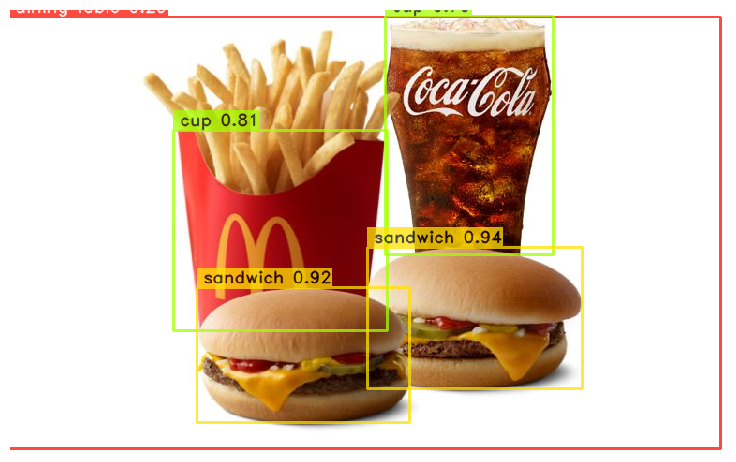

In [10]:
from super_gradients.training import models
from super_gradients.common.object_names import Models

net = models.get(Models.YOLO_NAS_S, pretrained_weights="coco")

pred = net.predict(image_url, conf=CONF_THRESH)
pred.show()

In [47]:
labels = pred._images_prediction_lst[0].prediction.labels
class_names = pred._images_prediction_lst[0].class_names 

In [48]:
[class_names[int(x)] for x in labels]

['sandwich', 'sandwich', 'cup', 'cup', 'dining table']

Zero shot object detection 

Provide labels and image - should perform better?

In [4]:
from transformers import pipeline

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[2023-09-21 09:01:44] INFO - instantiator.py - Created a temporary directory at /tmp/tmpyv76hqsg
[2023-09-21 09:01:44] INFO - instantiator.py - Writing /tmp/tmpyv76hqsg/_remote_module_non_scriptable.py


In [5]:
checkpoint = "google/owlvit-base-patch32"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [6]:
labels = ["french fries", "burger", "drink"]
predictions = detector(image, candidate_labels = labels)

In [53]:
predictions = [p for p in predictions if p['score']>= CONF_THRESH]

predictions

[{'score': 0.30979254841804504,
  'label': 'burger',
  'box': {'xmin': 380, 'ymin': 251, 'xmax': 616, 'ymax': 409}},
 {'score': 0.2952406406402588,
  'label': 'burger',
  'box': {'xmin': 200, 'ymin': 290, 'xmax': 431, 'ymax': 443}}]

In [54]:
from PIL import ImageDraw

draw = ImageDraw.Draw(image)

for pred in predictions:
    box = pred['box']
    label = pred['label']
    score = pred['score']
    draw.rectangle((box['xmin'], box['ymin'], box['xmax'],box['ymax']))
    draw.text((box['xmin'], box['ymin']), f'{label}: {round(score, 2)}', fill='black')

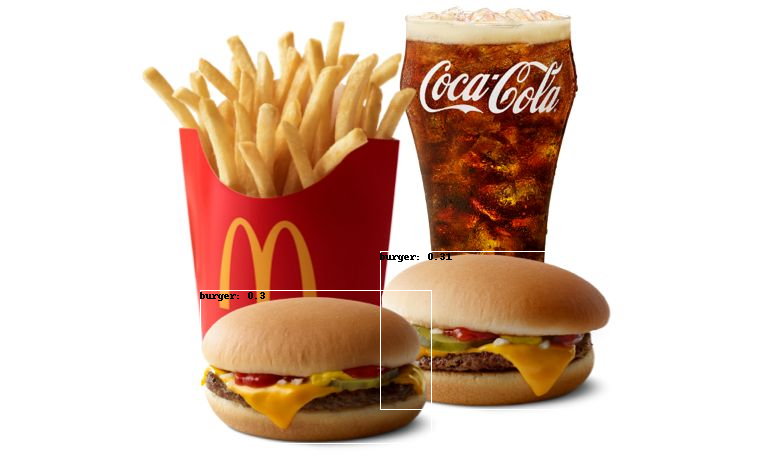

In [55]:
image